<a href="https://colab.research.google.com/github/Tissyjohnson/DSA_Class_Activities/blob/main/netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [104]:

excel = "/content/partpdf_1763620928546_netflix_titles.xlsx"
xl = pd.ExcelFile(excel)
print(xl.sheet_names)

['netflix_titles', 'netflix_titles_directors', 'netflix_titles_countries', 'netflix_titles_cast', 'netflix_titles_category']


In [105]:
sheet_names = ['netflix_titles', 'netflix_titles_directors', 'netflix_titles_countries', 'netflix_titles_cast', 'netflix_titles_category']
df = {netflix: pd.read_excel(excel, sheet_name=netflix) for netflix in sheet_names}
master = df["netflix_titles"]
for key in sheet_names[1:]:
    master = master.merge(df[key], on="show_id", how="left")


In [106]:
master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139946 entries, 0 to 139945
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   duration_minutes  98561 non-null   object 
 1   duration_seasons  41387 non-null   object 
 2   type              139945 non-null  object 
 3   title             139945 non-null  object 
 4   date_added        139785 non-null  object 
 5   release_year      139944 non-null  float64
 6   rating            139870 non-null  object 
 7   description       139943 non-null  object 
 8   show_id           139942 non-null  float64
 9   director          101031 non-null  object 
 10  country           134152 non-null  object 
 11  cast              138456 non-null  object 
 12  listed_in         139942 non-null  object 
dtypes: float64(2), object(11)
memory usage: 13.9+ MB


I used a **left join** to merge the other dataframes with the main `netflix_titles` dataframe on `show_id`.  
A left join ensures that every row in the main `netflix_titles` sheet is preserved in the final master dataframe, even if corresponding data in the associated sheets (cast, director, country, rating) is missing.If we used an inner join, we would lose titles that do not have entries in every supplementary sheet.


In [107]:
master.head()

,duration_minutes,duration_seasons,type,title,date_added,release_year,rating,description,show_id,director,country,cast,listed_in
0,90,NaN,Movie,Norm of the North: King Sized Adventure,2019-09-09 00:00:00,2019.0,TV-PG,Before planning an awesome wedding for his gra...,81145628.0,Richard Finn,United States,Alan Marriott,Children & Family Movies
1,90,NaN,Movie,Norm of the North: King Sized Adventure,2019-09-09 00:00:00,2019.0,TV-PG,Before planning an awesome wedding for his gra...,81145628.0,Richard Finn,United States,Alan Marriott,Comedies
2,90,NaN,Movie,Norm of the North: King Sized Adventure,2019-09-09 00:00:00,2019.0,TV-PG,Before planning an awesome wedding for his gra...,81145628.0,Richard Finn,United States,Jennifer Cameron,Children & Family Movies
3,90,NaN,Movie,Norm of the North: King Sized Adventure,2019-09-09 00:00:00,2019.0,TV-PG,Before planning an awesome wedding for his gra...,81145628.0,Richard Finn,United States,Jennifer Cameron,Comedies
4,90,NaN,Movie,Norm of the North: King Sized Adventure,2019-09-09 00:00:00,2019.0,TV-PG,Before planning an awesome wedding for his gra...,81145628.0,Richard Finn,United States,Lee Tockar,Children & Family Movies


In [108]:
master.columns

Index(['duration_minutes', 'duration_seasons', 'type', 'title', 'date_added',
       'release_year', 'rating', 'description', 'show_id', 'director',
       'country', 'cast', 'listed_in'],
      dtype='object')

In [109]:
master.shape

(139946, 13)

In [110]:
master.isnull().sum()

,0
duration_minutes,41385
duration_seasons,98559
type,1
title,1
date_added,161
release_year,2
rating,76
description,3
show_id,4
director,38915


In [111]:
master['country'] = master['country'].fillna('Unknown')
master['director'] = master['director'].fillna('Unknown')

In [112]:
master = master.drop(['duration_seasons', 'duration_minutes'], axis=1)

In [113]:
master['date_added'] = pd.to_datetime(master['date_added'], errors='coerce')
master['year_added'] = master['date_added'].dt.year
master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139946 entries, 0 to 139945
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   type          139945 non-null  object        
 1   title         139945 non-null  object        
 2   date_added    139784 non-null  datetime64[ns]
 3   release_year  139944 non-null  float64       
 4   rating        139870 non-null  object        
 5   description   139943 non-null  object        
 6   show_id       139942 non-null  float64       
 7   director      139946 non-null  object        
 8   country       139946 non-null  object        
 9   cast          138456 non-null  object        
 10  listed_in     139942 non-null  object        
 11  year_added    139784 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(8)
memory usage: 12.8+ MB


To handle missing values in the `country` column i chose to fill them with the placeholder `'Unknown'`.We opted thisbecause dropping rows with missing country data would result in the loss of datras that reducing our dataset size and possibly introducing bias. By using `'Unknown'`, some country information is unavailable. This allows for complete trend analysis without data loss, and also makes it easy to identify and filter these records later if necessary.

In [114]:
master.isnull().sum()

,0
type,1
title,1
date_added,162
release_year,2
rating,76
description,3
show_id,4
director,0
country,0
cast,1490


In [115]:
master['cast'] = master['cast'].fillna("")

master['cast'] = master['cast'].str.split(', ')
exploded_cast = master.explode('cast')

exploded_cast = exploded_cast[exploded_cast['cast'] != ""]

print(exploded_cast[['show_id', 'title', 'cast']].head())
print(exploded_cast.info())

      show_id                                    title              cast
0  81145628.0  Norm of the North: King Sized Adventure     Alan Marriott
1  81145628.0  Norm of the North: King Sized Adventure     Alan Marriott
2  81145628.0  Norm of the North: King Sized Adventure  Jennifer Cameron
3  81145628.0  Norm of the North: King Sized Adventure  Jennifer Cameron
4  81145628.0  Norm of the North: King Sized Adventure        Lee Tockar
<class 'pandas.core.frame.DataFrame'>
Index: 138456 entries, 0 to 139945
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   type          138456 non-null  object        
 1   title         138456 non-null  object        
 2   date_added    138298 non-null  datetime64[ns]
 3   release_year  138456 non-null  float64       
 4   rating        138386 non-null  object        
 5   description   138456 non-null  object        
 6   show_id       138456 non-null  float64     

Here we have used cast to explode exploding the `cast` column so each actor gets their own row, we cando more analysis For example, we can now easily calculate which actors appear most frequently across all shows, discover common actor collaborations, and analyze trends in casting over time. Previously, these analyses were difficult because actors were embedded in a single string per show. This transformation enables insights into actor popularity, diversity in casting, and the network of collaborations in the streaming catalog—valuable for marketing, recommendation algorithms, and content acquisition strategies.



In [116]:
master.isnull().sum()

,0
type,1
title,1
date_added,162
release_year,2
rating,76
description,3
show_id,4
director,0
country,0
cast,0


In [117]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [118]:
multi_valued = ["cast", "listed_in"]
categorical_cols = ["type", "title", "rating", "description", "director", "country"]
for col in categorical_cols:
    if col in multi_valued:
        master[col] = master[col].fillna("Unknown")
    else:
        mode_series = master[col].mode()
        fill_value = mode_series.iloc[0] if not mode_series.empty else "Unknown"
        master[col] = master[col].fillna(fill_value)

numerical_cols = ["release_year", "year_added","date_added","show_id"]
for col in numerical_cols:
    master[col] = pd.to_numeric(master[col], errors='coerce')
    mean_val = master[col].mean()
    master[col] = master[col].fillna(mean_val)

In [119]:
master.isnull().sum()

,0
type,0
title,0
date_added,0
release_year,0
rating,0
description,0
show_id,0
director,0
country,0
cast,0


In [120]:
numerical_cols = master.select_dtypes(include=['number']).columns

outlier_summary = {}

for col in numerical_cols:
    Q1 = master[col].quantile(0.25)
    Q3 = master[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers_mask = (master[col] < lower_bound) | (master[col] > upper_bound)
    outlier_count = outliers_mask.sum()
    outlier_summary[col] = {
        "outlier_count": int(outlier_count),
        "lower_bound": lower_bound,
        "upper_bound": upper_bound
    }
    print(f"{col}: {outlier_count} outliers (bounds: {lower_bound:.2f} to {upper_bound:.2f})")

master[outliers_mask]

date_added: 1458 outliers (bounds: 1428667200000000000.00 to 1641902400000000000.00)
release_year: 12517 outliers (bounds: 2003.00 to 2027.00)
show_id: 3189 outliers (bounds: 55348145.50 to 95155589.50)
year_added: 703 outliers (bounds: 2014.00 to 2022.00)


,type,title,date_added,release_year,rating,description,show_id,director,country,cast,listed_in,year_added
2529,Movie,Joseph: King of Dreams,1317081600000000000,2000.0,TV-PG,With his gift of dream interpretation and his ...,60003155.0,Rob LaDuca,United States,[Ben Affleck],Children & Family Movies,2011.0
2530,Movie,Joseph: King of Dreams,1317081600000000000,2000.0,TV-PG,With his gift of dream interpretation and his ...,60003155.0,Rob LaDuca,United States,[Ben Affleck],Dramas,2011.0
2531,Movie,Joseph: King of Dreams,1317081600000000000,2000.0,TV-PG,With his gift of dream interpretation and his ...,60003155.0,Rob LaDuca,United States,[Ben Affleck],Faith & Spirituality,2011.0
2532,Movie,Joseph: King of Dreams,1317081600000000000,2000.0,TV-PG,With his gift of dream interpretation and his ...,60003155.0,Rob LaDuca,United States,[Jodi Benson],Children & Family Movies,2011.0
2533,Movie,Joseph: King of Dreams,1317081600000000000,2000.0,TV-PG,With his gift of dream interpretation and his ...,60003155.0,Rob LaDuca,United States,[Jodi Benson],Dramas,2011.0
...,...,...,...,...,...,...,...,...,...,...,...,...
138559,TV Show,Breaking Bad,1375401600000000000,2013.0,TV-MA,A high school chemistry teacher dying of cance...,70143836.0,Unknown,United States,[Steven Michael Quezada],TV Dramas,2013.0
138560,TV Show,Breaking Bad,1375401600000000000,2013.0,TV-MA,A high school chemistry teacher dying of cance...,70143836.0,Unknown,United States,[Steven Michael Quezada],TV Thrillers,2013.0
138561,TV Show,Breaking Bad,1375401600000000000,2013.0,TV-MA,A high school chemistry teacher dying of cance...,70143836.0,Unknown,United States,[Jonathan Banks],Crime TV Shows,2013.0
138562,TV Show,Breaking Bad,1375401600000000000,2013.0,TV-MA,A high school chemistry teacher dying of cance...,70143836.0,Unknown,United States,[Jonathan Banks],TV Dramas,2013.0


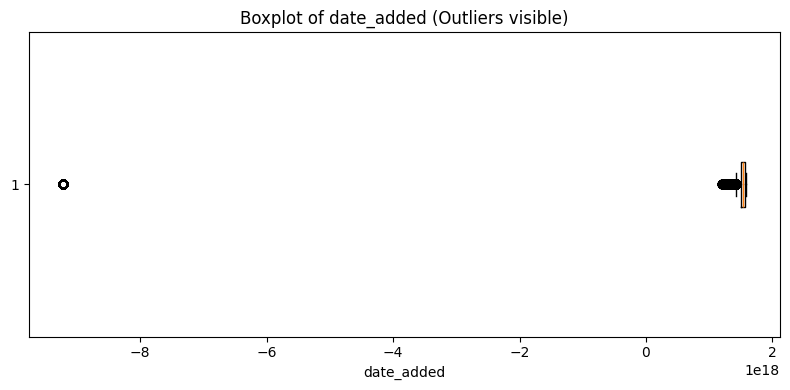

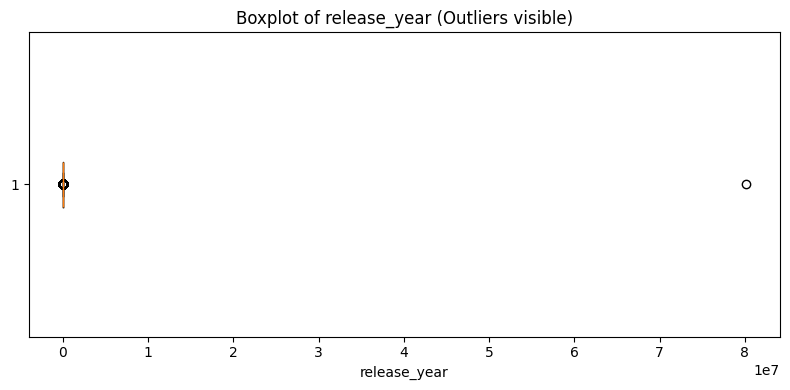

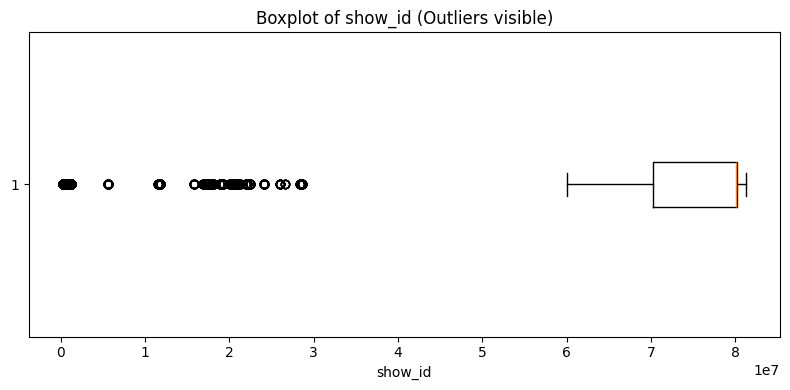

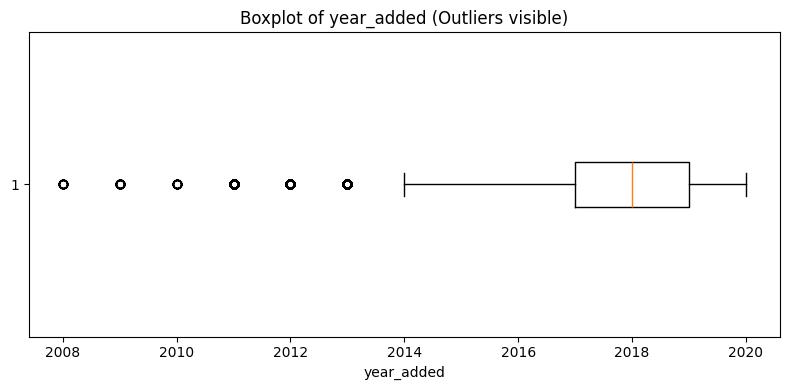

In [121]:
import matplotlib.pyplot as plt

for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    plt.boxplot(master[col], vert=False)
    plt.title(f'Boxplot of {col} (Outliers visible)')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()


In [122]:
for col in numerical_cols:
    Q1 = master[col].quantile(0.25)
    Q3 = master[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    master[col] = master[col].clip(lower, upper)

In [123]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# 1. Scaling Numerical Columns
scaler = MinMaxScaler()
# This creates new columns with '_scaled' suffix
for col in numerical_cols:
    # Ensure column is numeric
    master[col] = pd.to_numeric(master[col], errors='coerce')
    master[col + '_scaled'] = scaler.fit_transform(master[[col]])

# 2. Encoding Categorical Columns
for col in categorical_cols:
    # Fill missing as in your cleaning routine, then encode
    le = LabelEncoder()
    master[col + '_enc'] = le.fit_transform(master[col].astype(str))

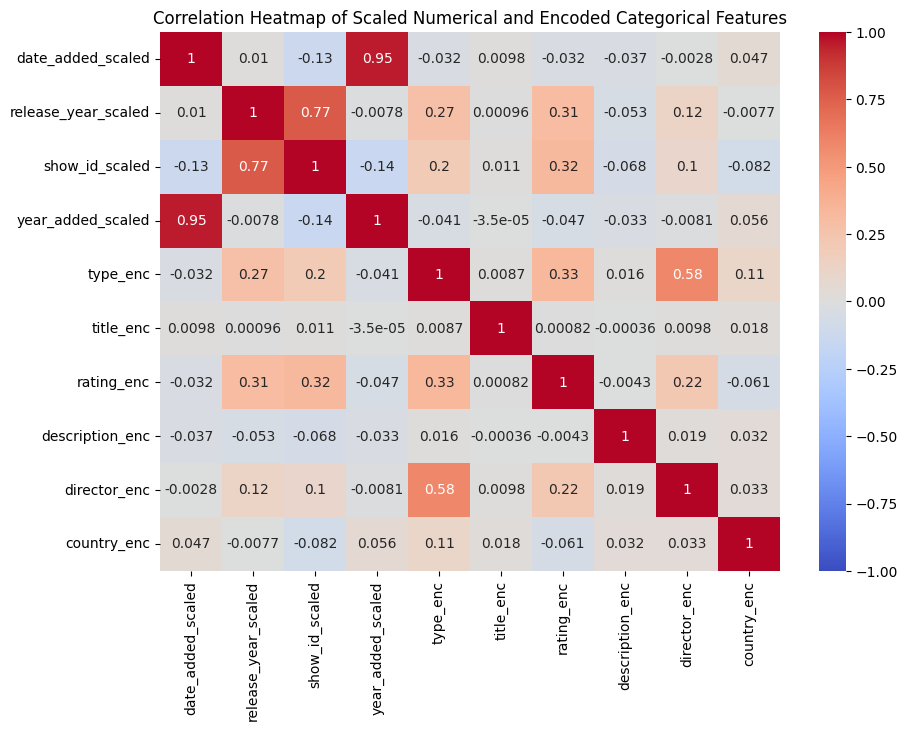

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns

# Collect all scaled and encoded column names
scaled_cols = [f"{col}_scaled" for col in numerical_cols]
encoded_cols = [f"{col}_enc" for col in categorical_cols]

# Create a correlation matrix using these columns
corr_matrix = master[scaled_cols + encoded_cols].corr()

# Plot the heatmap
plt.figure(figsize=(len(scaled_cols + encoded_cols), 7))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Scaled Numerical and Encoded Categorical Features')
plt.show()

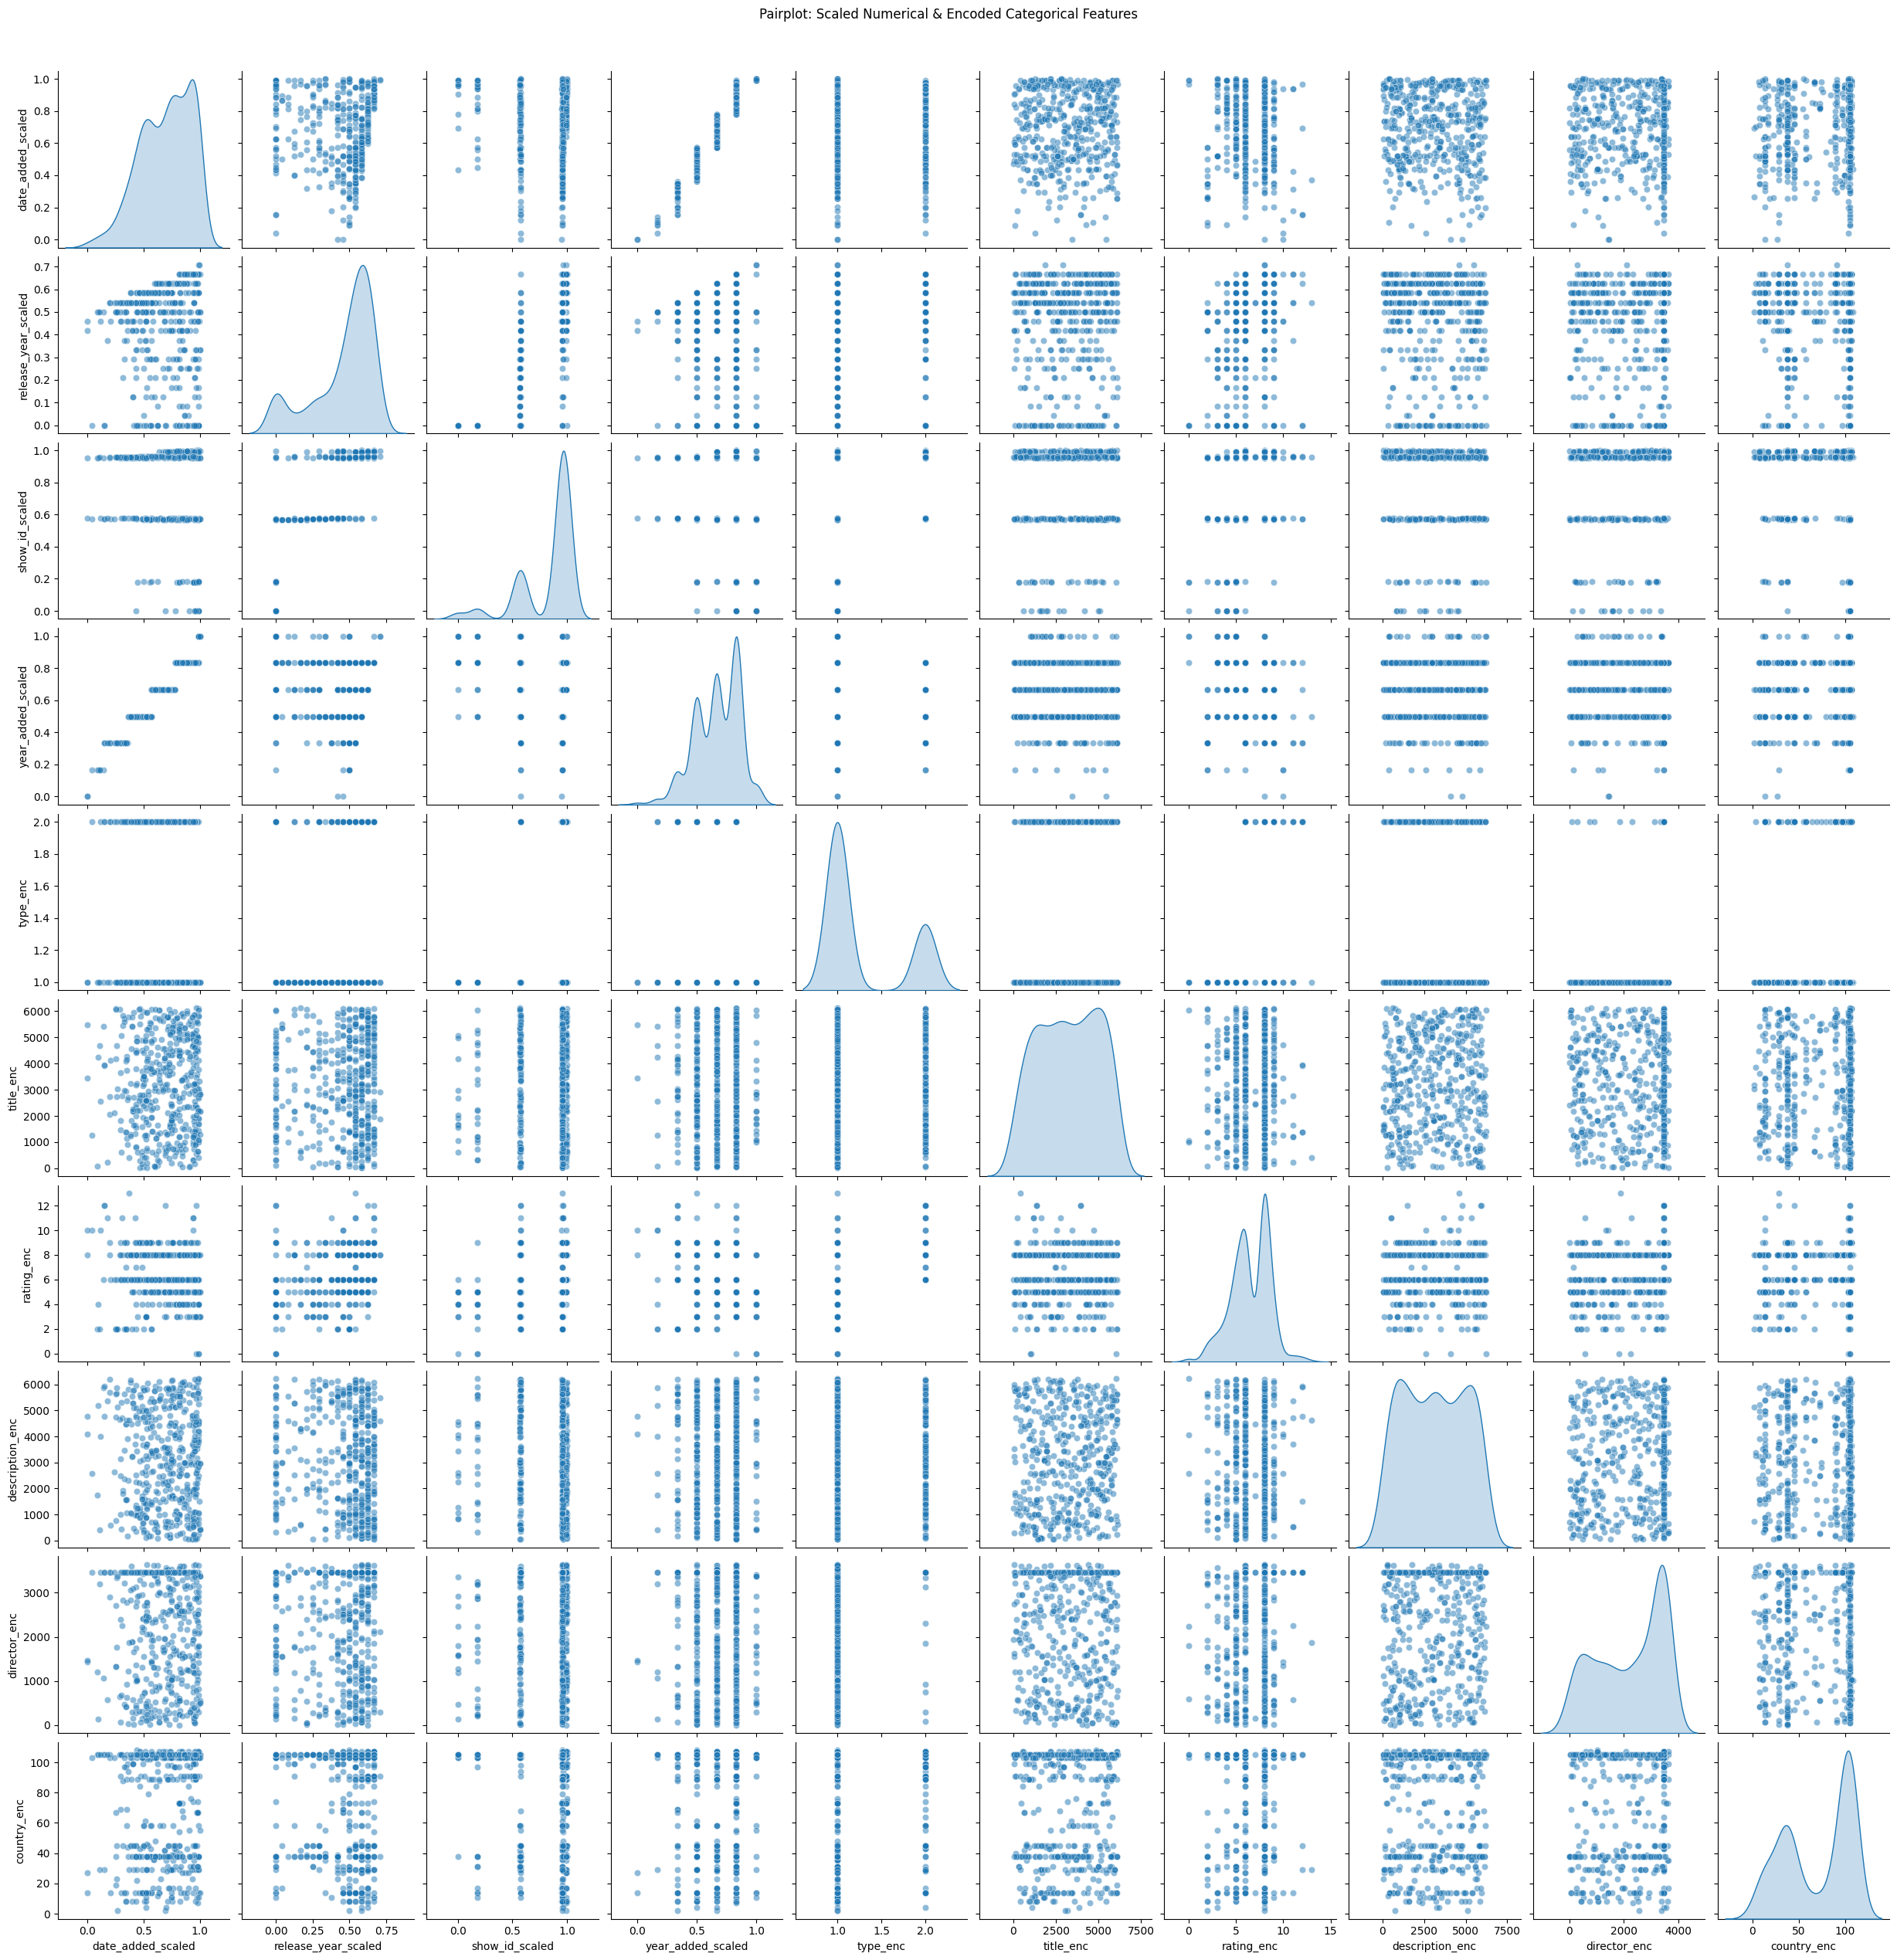

In [125]:
# Select a manageable subset if your data is large
plot_cols = scaled_cols + encoded_cols
sample_size = min(len(master), 500)
df_sample = master[plot_cols].sample(sample_size, random_state=42)

sns.pairplot(df_sample, diag_kind='kde', plot_kws={'alpha': 0.5})
plt.suptitle('Pairplot: Scaled Numerical & Encoded Categorical Features', y=1.02)
plt.show()

In [126]:
from sklearn.model_selection import train_test_split

# Define features
scaled_cols = [f"{col}_scaled" for col in numerical_cols]
encoded_cols = [f"{col}_enc" for col in categorical_cols]
feature_cols = scaled_cols + encoded_cols

# Example target: replace with your actual target
target_column = 'type_enc'  # <--- CHANGE to your actual target variable

X = master[feature_cols]
y = master[target_column]

In [127]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,      # 20% for test set
    random_state=42     # ensures reproducibility
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (111956, 10)
Test shape: (27990, 10)


In [128]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit on training data
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate performance (example)
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9999642729546266
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00     19803
           2       1.00      1.00      1.00      8186

    accuracy                           1.00     27990
   macro avg       0.67      0.67      0.67     27990
weighted avg       1.00      1.00      1.00     27990



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [129]:
import joblib

# Save the trained Random Forest model to a file
joblib.dump(model, "netflix_random_forest_model.pkl")

['netflix_random_forest_model.pkl']

In [130]:
top_actors = exploded_cast['cast'].value_counts().head(10)
print(top_actors)

cast
Alfred Molina         144
Liam Neeson           131
John Krasinski        123
John Rhys-Davies      122
Frank Langella        114
Salma Hayek           108
David Attenborough    105
Quvenzhané Wallis     100
Anupam Kher            99
Radhika Apte           95
Name: count, dtype: int64


0    Children & Family Movies
1                    Comedies
2    Children & Family Movies
3                    Comedies
4    Children & Family Movies
5                    Comedies
6    Children & Family Movies
7                    Comedies
8    Children & Family Movies
9                    Comedies
Name: listed_in, dtype: object
      show_id                                    title  \
0  81145628.0  Norm of the North: King Sized Adventure   
1  81145628.0  Norm of the North: King Sized Adventure   
2  81145628.0  Norm of the North: King Sized Adventure   
3  81145628.0  Norm of the North: King Sized Adventure   
4  81145628.0  Norm of the North: King Sized Adventure   
5  81145628.0  Norm of the North: King Sized Adventure   
6  81145628.0  Norm of the North: King Sized Adventure   
7  81145628.0  Norm of the North: King Sized Adventure   
8  81145628.0  Norm of the North: King Sized Adventure   
9  81145628.0  Norm of the North: King Sized Adventure   

                  listed_in  


/tmp/ipython-input-1426365791.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.index, y=top_genres.values, palette="viridis")


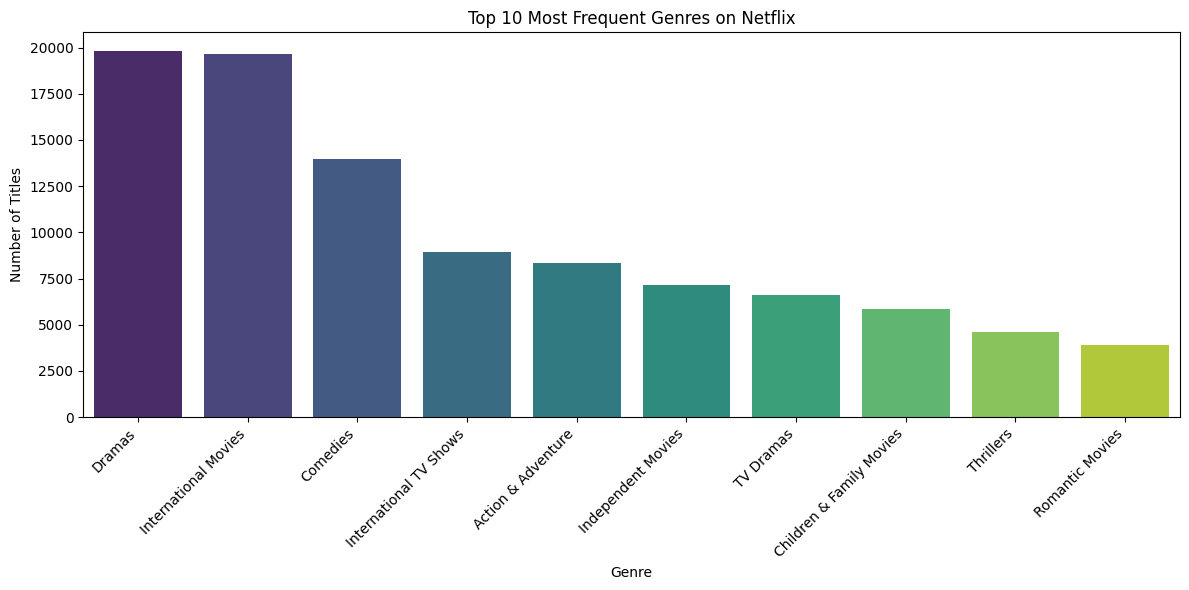

In [131]:
# 2. Confirm that 'listed_in' exists and is not empty
print(master['listed_in'].head(10))

# 3. Cleaning: Fill missing and explode genres ('listed_in')
master['listed_in'] = master['listed_in'].fillna('')
master['listed_in'] = master['listed_in'].astype(str)
master['listed_in'] = master['listed_in'].str.split(',')   # Use ',' to handle all cases
exploded_genre = master.explode('listed_in')
exploded_genre['listed_in'] = exploded_genre['listed_in'].str.strip()
exploded_genre = exploded_genre[exploded_genre['listed_in'] != ""]
exploded_genre = exploded_genre[exploded_genre['listed_in'].notnull()]
print(exploded_genre[['show_id', 'title', 'listed_in']].head(10))
print(exploded_genre['listed_in'].unique()[:10])
print(len(exploded_genre))
top_genres = exploded_genre['listed_in'].value_counts().head(10)
print(top_genres)
plt.figure(figsize=(12,6))
sns.barplot(x=top_genres.index, y=top_genres.values, palette="viridis")
plt.title('Top 10 Most Frequent Genres on Netflix')
plt.xlabel('Genre')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [135]:
master.to_csv("netflix.csv",index=False,encoding='utf-8')